In [1]:
#Multivariate Linear Regression Model for 1974 Motor Trend US magazine Car data set
#The data comprises fuel consumption and 10 aspects of automobile design and 
#performance for 32 automobiles (1973-74 models).

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from matplotlib.pyplot import *
%matplotlib inline

In [6]:
#Load the data
A=pd.read_csv('car_data.csv',index_col=0)
A.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
#Check collinearilty between the variables
C=A.corr()
print(C)

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

In [5]:
C.iloc[0,:]

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [9]:
#Extracting the required predictor variables from the data
x1=A['disp']
x2=A['hp']
x3=A['wt']
y=A['mpg']

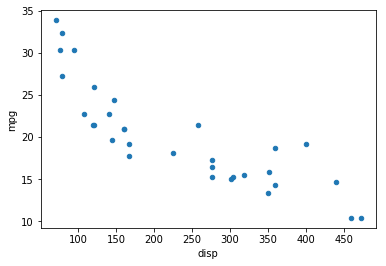

In [7]:
#Visualize Scatter Plot for each combination of X & Y
A.plot.scatter(x='disp',y='mpg')

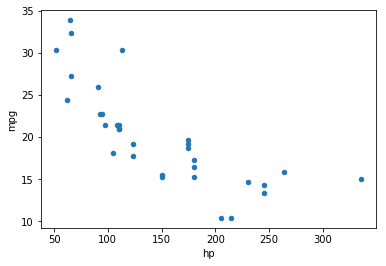

In [8]:
A.plot.scatter(x='hp',y='mpg')

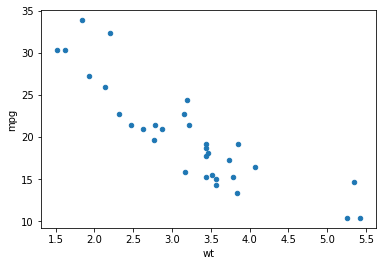

In [9]:
A.plot.scatter(x='wt',y='mpg')

In [11]:
m1=ols('y~x1',A).fit()
m1.params
m1_pred=m1.params[0]+m1.params[1]*x1
def my_rmse(y,ycap):
    rmse=np.sqrt(sum((y-ycap)**2)/len(y))
    return rmse

In [12]:
r1=my_rmse(y,m1_pred)
r1

3.1482072740002796

In [13]:
#Fitting a Bivariate Model
model_1=ols('y~x1+x3',A).fit()
model_1.params

Intercept    34.960554
x1           -0.017725
x3           -3.350825
dtype: float64

In [15]:
y1_predict=model_1.params[0]+model_1.params[1]*x1+model_1.params[2]*x3
#verify first 5 values of y_predict with actual mileage
print(y1_predict[:5])
print(y[:5])
r_y1_pred=my_rmse(y,y1_predict)
r_y1_pred

Mazda RX4            23.345433
Mazda RX4 Wag        22.490972
Datsun 710           25.272367
Hornet 4 Drive       19.614667
Hornet Sportabout    17.052807
dtype: float64
Mazda RX4            21.0
Mazda RX4 Wag        21.0
Datsun 710           22.8
Hornet 4 Drive       21.4
Hornet Sportabout    18.7
Name: mpg, dtype: float64


2.776477660576745

In [14]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           2.06e-09
Time:                        08:08:06   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7359      1.332     23.083      0.000      28.013      33.459
x1            -0.0303      0.007     -4.098      0.000      -0.045      -0.015
x2            -0.0248      0.013     -1.856      0.074      -0.052       0.003
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Built other combinations & Infer